In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 39)

In [ ]:
#Importando base dados com informações de evasão dos clientes de uma empresa de telecomunicações
#Objetivo: saber se um cliente vai ou não sair (churn)
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv')
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [ ]:
dados.shape

(7043, 18)

# Transformando as variáveis categóricas 


In [ ]:
#Forma manual

dic = {
    'Sim':1,
    'Nao':0
}

#replace substitui os valores das celulas de um DF de acordo com um dicionario
dadosmodificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(dic) 
dadosmodificados


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1
...,...,...,...,...,...
7038,1,1,1,1,0
7039,1,1,1,1,0
7040,1,1,0,1,0
7041,1,0,1,1,1


In [ ]:
# Forma com get_dummies
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis = 1))

In [ ]:
#juntando os dados
dados_final = pd.concat([dadosmodificados, dummie_dados], axis =1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


# Definição formal


***X*** = inputs (dados de entrada) <br>
***Y*** = outputs (dados de saída)

In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]
#Ymaria = ?
#f(Xmaria) = Ymaria

# Balanceando os dados

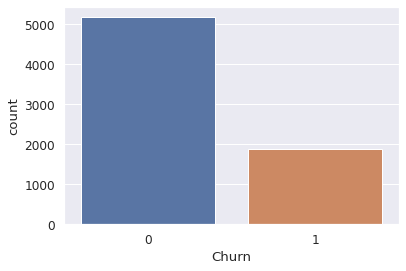

In [ ]:
import seaborn as sns
%matplotlib inline

#Da para perceber que a variável Churn está desproporcional e isso pode gerar problemas
fig = sns.countplot(x = 'Churn', data = dados_final)
fig

In [ ]:
# Deixando a variável 'Churn' balanceada com a tecnica de oversampling chamada SMOTE
#Usando a biblioteca imbalanced-learn para esse fim 
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e respostas
x = dados_final.drop(['Churn'], axis =1)
y = dados_final['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

seed = 123
np.random.seed(seed)

smt = SMOTE()# Instancia um objeto da classe SMOTE
x,y =smt.fit_resample(x,y) #Realiza a reamostragem do conjunto de dados para ficar equilibrado

In [ ]:
#O tamanho de y e x aumentaram, pois amostras intermediárias de valores foram criados 
print(x.shape)
print(y.shape)


(10348, 38)
(10348,)


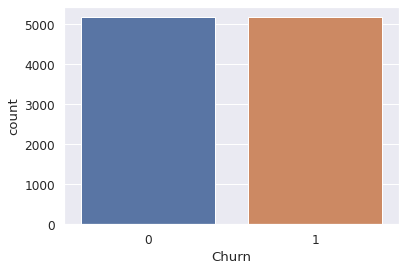

In [ ]:
dados_final = pd.concat([x,y], axis =1)# Concatena a variável target (y) com as features (X)
fig = sns.countplot(x= 'Churn', data=dados_final)
fig

# Ao analisarmos a variável classificadora ‘Churn’, 
# podemos notar que há menos clientes contendo Sim - 1 do que Não - 0. 
# Para que o aprendizado do algoritmo não seja afetado pela falta de informações referentes ao Churn de clientes que nos deixaram (Sim), 
# foi necessário aplicar uma técnica de balanceamento.


Para aprofundar no tema:
https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9

# KNN 



In [ ]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [ ]:
# Divisão em inputs e outputs
x = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [ ]:
#Como KNN usa a distancia como classificador, então devo deixar todos os dados
#na mesma escala (distancia_real/distancia_imaginaria)

from sklearn.preprocessing import StandardScaler

Como a função de normalização funciona ?
* O escalador pega cada um dos atributos de Maria, por exemplo, e subtai da media dos atributos e divide pelo desvio padrão, normalizando o atributo

In [ ]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
x_norm[0]

array([ 1.26542767, -0.52756038, -3.06083934,  0.8149851 , -0.41334384,
       -1.10768354, -1.32176205, -0.88482108,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.868102  , -0.44617598,
       -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
       -0.44617598, -0.64211419,  0.87997069, -0.44617598, -0.52426638,
        1.18643645, -0.44617598, -0.77707385,  1.2033586 , -0.44617598,
       -0.78992399, -0.44648735,  0.73773107, -0.41989297, -0.42576817,
        1.30292044, -0.47943196, -0.43617215])

In [ ]:
#normalizando maria
Xmaria_norm = scaler.transform(pd.DataFrame(Xmaria, columns = x.columns))# essa funçao so funciona em 2D
Xmaria_norm

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

Distancia Euclidiana:
$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

In [ ]:
#calculo da distancia euclidiana de maria ao primeiro cliente de x
import numpy as np

In [ ]:
a = Xmaria_norm
b = x_norm[0]

In [ ]:
#começar subtraindo
a-b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166355,  0.34940734,  2.01499307, -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01637218,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03436608,  0.        ,
         2.05586858,  0.        , -2.09323857,  2.80145225,  0.        ,
        -2.07042701,  0.        ,  2.72884488]])

In [ ]:
#elevando a-b ao quadrado
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73585140e-03, 1.22085486e-01, 4.06019707e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06575675e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13864535e+00, 0.00000000e+00, 4.22659561e+00, 0.00000000e+00,
        4.38164773e+00, 7.84813473e+00, 0.00000000e+00, 4.28666801e+00,
        0.00000000e+00, 7.44659439e+00]])

In [ ]:
#somatorio de todos os resultados
np.sum(np.square(a-b))

91.70603225977928

In [ ]:
#raiz quadrada
np.sqrt(np.sum(np.square(a-b)))

9.576326657950807

Existem muitas medidas de distancia que o algoritmo KNN pode usar, basta alterar o parametro ***metric*** em ***sklearn.neighbors.KNeighborsClassifier***:
* **“euclidean”** para a distância euclidiana
$$d=\sqrt{(X_{1}-Y_{1})^2+ ...+X_{n}-Y_{n})^2}$$
* **“manhattan”** para a distância de Manhattan:
$$d=|X_{1}-Y_{1}| +...+|X_{n}-Y_{n}|$$
* **“minkowski”** para a distância de Minkowski **(default do sklearn)**:
$$d=\sqrt[m]{|X_{1}-Y_{1}|^m +...+|X_{n}-Y_{n}|^m}$$
* **“chebyshev”** para a distância de Chebyshev:
$$d=max\{ |X_{1}-Y_{1}| ,...,|X_{n}-Y_{n}|\}$$

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric'>Documentação</a>


[texto do link](https://)

In [ ]:
#implementando o moledo
import numpy as np
from sklearn.model_selection import train_test_split
seed =123
np.random.seed(seed)

x_treino, x_teste, y_treino, y_teste=train_test_split(x_norm, y, stratify=y,test_size=0.3, )

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
seed =123
np.random.seed(seed)

knn = KNeighborsClassifier(metric = 'euclidean') #Por padrao k é 5 (bom valor)
knn.fit(x_treino, y_treino)


KNeighborsClassifier(metric='euclidean')

In [ ]:
predict_knn = knn.predict(x_teste)

# Desafio
Calcule a distância da Maria com os(as) 10 primeiros(as) clientes da nossa base de dados normalizada utilizando a métrica euclidiana.

In [ ]:
import numpy as np
dist = []
X_norm10 = x_norm[:10]
Xmaria_norm

for pessoa in X_norm10:
  dist.append(np.sqrt(np.sum(np.square(Xmaria_norm-pessoa))))

pd.concat([pd.Series(dist), pd.Series(y[:10])], axis=1).sort_values(by=0)

,0,Churn
4,7.802583,1
9,7.919934,0
2,8.496555,1
6,8.969900,0
5,9.011363,1
1,9.164065,0
8,9.450058,1
0,9.576327,0
3,10.037407,0
7,10.634386,0


# Bernoulli Navie Bayes


In [ ]:
#Importando a biblioteca
from sklearn.naive_bayes import BernoulliNB

In [ ]:
#Encontrando a mediana dos meus dados de teino
np.median(x_treino)

-0.4461759755508453

## Entendendo como o parametro binarize funciona

In [ ]:
from sklearn.preprocessing import binarize
import numpy as np

rng = np.random.RandomState(1)
X = rng.randint(5, size=(6, 1))
X

array([[3],
       [4],
       [0],
       [1],
       [3],
       [0]])

In [ ]:
#binarize transforma todos os valores maiores que threshold em 1 e menores ou iguais a 3 em 0
binarize(X, threshold = 3)

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0]])

## Criando o modelo

In [ ]:
#O modelo de bernouliNB só funciona com características binárias, por isso, uso o parametro binarize
#O valor threshold de binarize é definido por mim como a mediana de todos os dados (poderia ser media, moda, ...)
bnb = BernoulliNB(binarize=np.median(x_treino))

In [ ]:
bnb.fit(x_treino, y_treino)

BernoulliNB(binarize=-0.4461759755508453)

In [ ]:
predict_bnb = bnb.predict(x_teste)
predict_bnb

array([1, 1, 1, ..., 0, 0, 1])

# Implementando arvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy') #instanciado a arvora com o criterio de divisão da arvore por entropia 
dtc.fit(x_treino, y_treino)



DecisionTreeClassifier(criterion='entropy')

In [ ]:
#feature_importances verifica a importancia de cada atributo/variavel de acordo com 'criterion'
dtc.feature_importances_ #quanto menor o valor da entropia, menor a desordem

array([0.01642256, 0.02153638, 0.00551268, 0.02412642, 0.01698148,
       0.16823788, 0.21594765, 0.01055604, 0.00376669, 0.00995625,
       0.00182287, 0.03400578, 0.        , 0.00914519, 0.        ,
       0.01449922, 0.00662074, 0.        , 0.00984474, 0.01213094,
       0.        , 0.00831182, 0.01560201, 0.        , 0.01470878,
       0.00454858, 0.        , 0.00712571, 0.00870354, 0.00472104,
       0.01043638, 0.03816755, 0.16237056, 0.07512163, 0.01548122,
       0.01602291, 0.02046795, 0.01709683])

In [ ]:
predict_arvore = dtc.predict(x_teste)

In [ ]:
predict_arvore

array([1, 1, 1, ..., 0, 0, 0])

# Validando os modelos


## matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#matriz de confusão para knn
print(confusion_matrix(y_teste,predict_knn))
#Retorna a matriz de confusão com a quantidade de valores em cada caixinha
#[[VN FP]
# [FN VP]]

[[1233  320]
 [ 239 1313]]


In [ ]:
#matriz de confusão para knn
print(confusion_matrix(y_teste,predict_bnb))
#[[VN FP]
# [FN VP]]

[[1046  507]
 [ 247 1305]]


In [ ]:
#matriz de confusão para knn  
print(confusion_matrix(y_teste, predict_arvore))
#[[VN FP]
# [FN VP]]

[[1252  301]
 [ 319 1233]]


### gerando matriz de confusão graficamente


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz_binaria(
    matriz_confusao, 
    labels =  ['Verdadeiro Negativo','Falso Positivo',
                'Falso Negativo','Verdadeiro Positivo'], 
    categorias = ['0','1'], 
    cmap='viridis'
    ):
  
  #Abaixo formato o que está escrito em cada quadradinho do grafico na forma:
  #"nome_quadradinho"\n"valor_numerico_quantidade"
  matriz_1D = matriz_confusao.flatten() #Transforma a matriz 2D em 1D
  label_formatado = [f"{v1}\n{v2}" for v1, v2 in zip(labels, matriz_1D)]#zip pega cada elemento de labels e matriz_1D e coloca em tuplas
  label_formatado = np.asanyarray(label_formatado).reshape(matriz_confusao.shape)#Transformo label_formatado em um array numpy depois coloco em 2D

  ax = plt.subplot() #Crio espaço para o grafico com matplotlib
  sns.set(font_scale = 1.1) #Seto tamanho da fonte do grafico 
  sns.heatmap(
      matriz_confusao, #dados em 2D
      annot = label_formatado, #passo o que está escrito em cada quadradinho em 2D
      cmap = cmap, #cores
      fmt = '',
      xticklabels=categorias, #Textos no eixo X 
      yticklabels=categorias, #Textos no eixo Y
      ax=ax #Espaço do grafico
  )

  #Colocando titulos no eixos X e Y com matplotlib
  label_font = {'size':'12'}
  ax.set_xlabel('Valores preditos')
  ax.set_ylabel('Valores verdadeiros')

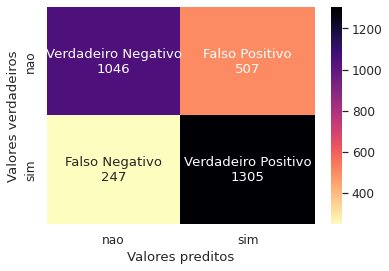

In [ ]:
categorias = ["nao", "sim"]

labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

gerando_matriz_binaria(confusion_matrix(y_teste,predict_bnb), labels, categorias, cmap="magma_r")

## Acurácia

calculo da acurácia pela matriz de confusão
$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Modelo KNN
print("%.2lf%%" % (accuracy_score(y_teste, predict_knn)*100) )

82.00%


In [ ]:
#Modelo BNB
print("%.2lf%%" % (accuracy_score(y_teste, predict_bnb)*100))

75.72%


In [ ]:
#Arvore
print("%.2lf%%" % (accuracy_score(y_teste, predict_arvore)*100))

80.03%


## Precisão
Calcula quantos verdadeiros positivos foram calculados de forma correta:

$$PS = {TP \over TP+FP}$$

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
#Modelo KNN
print("%.2lf%%" % (precision_score(y_teste, predict_knn)*100) )

80.40%


In [ ]:
#Modelo BNB
print("%.2lf%%" % (precision_score(y_teste, predict_bnb)*100))

72.02%


In [ ]:
#Arvore
print("%.2lf%%" % (precision_score(y_teste, predict_arvore)*100))

80.38%


## Recall

Recall, revocação ou sensibilidade calcula o quão bom o modelo está para classificar corretamente um resultado **verdadeiro** positivo (TP)

$$ RC = {TP \over TP +FN}$$

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
#Modelo KNN
print("%.2lf%%" % (recall_score(y_teste, predict_knn)*100) )

84.60%


In [ ]:
#Modelo BNB
print("%.2lf%%" % (recall_score(y_teste, predict_bnb)*100))

84.09%


In [ ]:
#Arvore
print("%.2lf%%" % (recall_score(y_teste, predict_arvore)*100))

79.45%
